In [1]:
import scipy.optimize as opt
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import SqrtStretch
import matplotlib.pyplot as plt
plt.style.use(astropy_mpl_style)
from fonctions import *

In [2]:
# Opening the images
from PIL import Image

img = fits.getdata('image2.fit')
bias = fits.getdata('bias.fit')
dark = fits.getdata('dark.fit')
flat = fits.getdata('flat.fit')

# Averaging the calibration frames
bias = averageFolder('bias')
dark = averageFolder('dark')
flat = averageFolder('flat')

/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_97843/301236486.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ca = plt.colorbar()


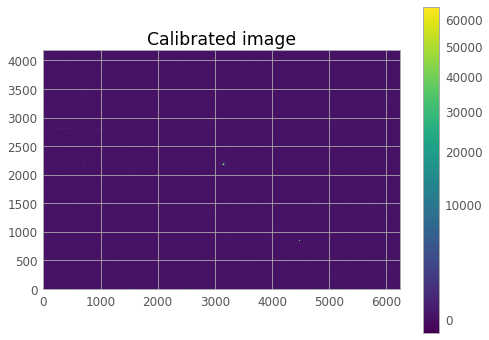

In [3]:
# Image calibrated using the different calibration frames
#from fonctions import *
image_clean = calibrate(img, bias, dark, flat)
#image_clean = image_clean - np.min(image_clean)
#image_clean = image_clean / np.max(image_clean) * (2**16-1)
plt.figure()
plt.title('Calibrated image')
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(image_clean, norm=norm, origin='lower', cmap='viridis', interpolation='none')
ca = plt.colorbar()
plt.show()

/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_97843/2248253795.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


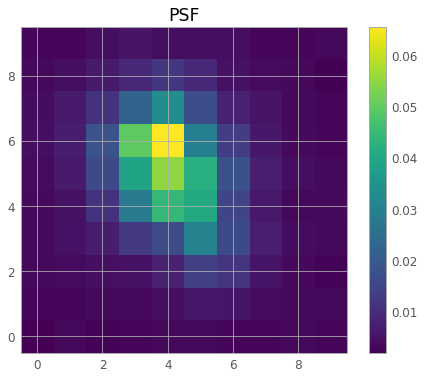

In [4]:
# PSF of one star
#PSF = image_clean[2926-10:2926+10, 2029-10:2029+10]
PSF = image_clean[2628:2638, 822:832]
PSF = PSF / np.sum(PSF) #normalized as a distribution to 1
plt.figure()
plt.title('PSF')
plt.imshow(PSF, origin='lower', cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()


[-5.13116721e-01  7.29179252e-01  2.17840573e+00  1.36149008e+00
  8.35880749e-01  1.63899130e+07]


/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_97843/3449355206.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_97843/3449355206.py:16: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xs, ys, interpolated_data.reshape(10, 10), 5, colors='w', label='test')


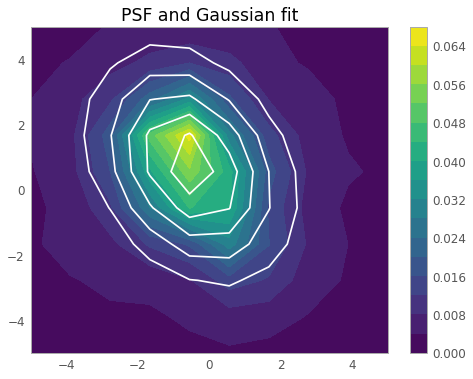

In [5]:
# Fitting of the model on the star
initial_guess = (0, 0, 1, 1, 0.1, np.pi/4)
xs = np.linspace(-5, 5, 10)
ys = np.linspace(-5, 5, 10)
xy = np.meshgrid(xs, ys)
xy = np.ravel(xy)
params, covar = opt.curve_fit(gaussian2D, xy, np.ravel(PSF), p0=initial_guess)
print(params)
interpolated_data = gaussian2D(xy, params[0], params[1],
                               params[2], params[3], params[4], params[5])

plt.figure()
plt.title('PSF and Gaussian fit')
plt.contourf(xs, ys, PSF, 20, origin='lower', cmap='viridis')
plt.colorbar()
plt.contour(xs, ys, interpolated_data.reshape(10, 10), 5, colors='w', label='test')


In [6]:
print('FWHH and angle: {:.2f}, {:.2f}, {:.2f}'.format(params[2], params[3], params[-1]*180/np.pi))

FWHH and angle: 2.18, 1.36, 939072841.02
